In [1]:
import sys
import os
# Add the parent directory to the path to import MVPAnalyzer
sys.path.append(os.path.dirname(os.getcwd()))

from MVPAnalyzer import Analyzer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mvpa = Analyzer('/home/maxw/Documents/ESSTECH25/MVP300_DATA/Stationary_Profiling/',subdirs=True)

# mvpa.help()

mvpa.load_mvp_data(format='ncdf') 

mvpa.load_ctd_data(format='ncdf',data_path_ctd='/home/maxw/Documents/ESSTECH25/BATHYSONDE/DATA/TRAIT/NCDF/')

mvpa.keep_selected_profiles([0, 10, 8, 2], [0, 2, 4, 8])
# mvpa.keep_selected_profiles([0,10,8,2])



mvpa.viscous_heating_correction()
print('Viscous heating correction done.')
mvpa.filtering_surface_waves(correction=True)
print('Surface wave filtering done.')
# mvpa.temporal_lag_correction(correction=True)
# print('Temporal lag correction done.')



mvpa.compute_waterflow(0.0, corr=True)


sqlength = 4000
mvpa.interpolate_CTD_and_MVPcorrected(sqlength+1000)

/home/maxw/miniconda3/envs/oceanapp/lib/python3.11/site-packages/seabird/cnv.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Found 1 MVP files in the directory: /home/maxw/Documents/ESSTECH25/MVP300_DATA/Stationary_Profiling/
MVP data loaded successfully.
Found 5 CTD files in the directory: /home/maxw/Documents/ESSTECH25/BATHYSONDE/DATA/TRAIT/NCDF/
CTD data loaded successfully.
Viscous heating correction done.
Surface wave filtering done.
Water flow speed computed successfully.
CTD data interpolated onto corrected MVP pressure levels.


In [2]:
# Nouvelle cellule - DIAGNOSTIC TAILLES
print("=== DIAGNOSTIC TAILLES PROFILS ===")

# Vérifier les tailles des profils MVP
print("Tailles des profils MVP (avant interpolation):")
for i in range(len(mvpa.TEMP_mvp)):
    if hasattr(mvpa, 'TEMP_mvp') and i < len(mvpa.TEMP_mvp):
        print(f"Profil MVP {i}: {len(mvpa.TEMP_mvp[i])} points")

# Vérifier après interpolation
if hasattr(mvpa, 'TEMP_mvp_corr_interp'):
    print(f"\nAprès interpolation (sqlength={sqlength}):")
    for i in range(len(mvpa.TEMP_mvp_corr_interp)):
        valid_points = ~np.isnan(mvpa.TEMP_mvp_corr_interp[i])
        n_valid = np.sum(valid_points)
        n_nan = np.sum(np.isnan(mvpa.TEMP_mvp_corr_interp[i]))
        print(f"Profil {i}: {n_valid} points valides, {n_nan} NaN sur {len(mvpa.TEMP_mvp_corr_interp[i])} total")

# Recommandation
max_valid = 0
if hasattr(mvpa, 'TEMP_mvp_corr_interp'):
    for i in range(len(mvpa.TEMP_mvp_corr_interp)):
        n_valid = np.sum(~np.isnan(mvpa.TEMP_mvp_corr_interp[i]))
        max_valid = max(max_valid, n_valid)

print(f"\n💡 RECOMMANDATION:")
print(f"   Taille maximale de profil valide: {max_valid}")
print(f"   sqlength actuel: {sqlength}")
if sqlength > max_valid:
    recommended = min(max_valid, 4000)  # Sécurité
    print(f"   ⚠️  RÉDUIRE sqlength à {recommended}")
else:
    print(f"   ✅ sqlength OK")

=== DIAGNOSTIC TAILLES PROFILS ===
Tailles des profils MVP (avant interpolation):
Profil MVP 0: 28877 points
Profil MVP 1: 28877 points
Profil MVP 2: 28877 points
Profil MVP 3: 28877 points
Profil MVP 4: 28877 points
Profil MVP 5: 28877 points
Profil MVP 6: 28877 points
Profil MVP 7: 28877 points

Après interpolation (sqlength=4000):
Profil 0: 3966 points valides, 1034 NaN sur 5000 total
Profil 1: 3962 points valides, 1038 NaN sur 5000 total
Profil 2: 4960 points valides, 40 NaN sur 5000 total
Profil 3: 4956 points valides, 44 NaN sur 5000 total
Profil 4: 4997 points valides, 3 NaN sur 5000 total
Profil 5: 4992 points valides, 8 NaN sur 5000 total
Profil 6: 4995 points valides, 5 NaN sur 5000 total
Profil 7: 4989 points valides, 11 NaN sur 5000 total

💡 RECOMMANDATION:
   Taille maximale de profil valide: 4997
   sqlength actuel: 4000
   ✅ sqlength OK


In [3]:
# Import PyTorch and neural network components
try:
    import torch

    print("PyTorch imported successfully!")
    print(f"PyTorch version: {torch.__version__}")
    print(f"CUDA available: {torch.cuda.is_available()}")
    
    # Import our custom neural network
    from utils import prepare_training_data
    from architecture import ThermalMassDataset
    from train import train_thermal_mass_network
    print("Neural network architecture imported successfully!")
    
except ImportError as e:
    print(f"Error importing PyTorch: {e}")
    print("Please install PyTorch: pip install torch")
    print("Continuing with data preparation...")

PyTorch imported successfully!
PyTorch version: 2.8.0
CUDA available: False
Neural network architecture imported successfully!


/home/maxw/miniconda3/envs/oceanapp/lib/python3.11/site-packages/torch/cuda/__init__.py:182: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1758491028874/work/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
import utils
import importlib
importlib.reload(utils)
from utils import prepare_training_data

# Prepare the training data
mvp_data, ctd_data = prepare_training_data(mvpa)

Processing 8 profiles...
Added pair (0,1) - Down: 3966 pts, Up: 3962 pts
Added pair (2,3) - Down: 4960 pts, Up: 4956 pts
Added pair (4,5) - Down: 4995 pts, Up: 4992 pts
Added pair (6,7) - Down: 4994 pts, Up: 4988 pts

Prepared 4 valid profile pairs for training


In [9]:
import train
import importlib
importlib.reload(train)
from train import train_thermal_mass_network

# Train the model if we have data and PyTorch is available
if 'torch' in globals() and len(mvp_data['TEMP_down']) > 0:
    print("Starting neural network training...")
    trained_model, train_losses, val_losses = train_thermal_mass_network(mvp_data, ctd_data, 
                                                                        sequence_length=sqlength, 
                                                                        num_epochs=200)
    
    if trained_model is not None:
        print("Training completed successfully!")
    else:
        print("Training failed.")
else:
    print("Skipping training: PyTorch not available or no data")

Starting neural network training...
Training neural network with 4 profile pairs...
Training set: 3 pairs, Validation set: 1 pairs
Using device: cpu
Model parameters: 21,176
⚠️  NaN détecté après LSTM, remplacement par zéros
Entrées - T_down NaN: 8, C_down NaN: 8
         T_up NaN: 19, C_up NaN: 19
Salinités - S_down NaN: 8, S_up NaN: 19
           S_down range: nan-nan
           S_up range: nan-nan
CTD ref - S_ctd_down NaN: 144, S_ctd_up NaN: 144
⚠️  Nettoyage S_down_corrected
⚠️  Nettoyage S_up_corrected
Valid points - Down: 9852/10000, Up: 9841/10000
Loss components: down=0.000890, up=0.001125, reg=0.000625, total=0.002640
⚠️  NaN détecté après LSTM, remplacement par zéros
Entrées - T_down NaN: 40, C_down NaN: 40
         T_up NaN: 44, C_up NaN: 44
Salinités - S_down NaN: 40, S_up NaN: 44
           S_down range: nan-nan
           S_up range: nan-nan
CTD ref - S_ctd_down NaN: 78, S_ctd_up NaN: 78
⚠️  Nettoyage S_down_corrected
⚠️  Nettoyage S_up_corrected
Valid points - Down: 4921

\n============================================================
TRAINING ANALYSIS


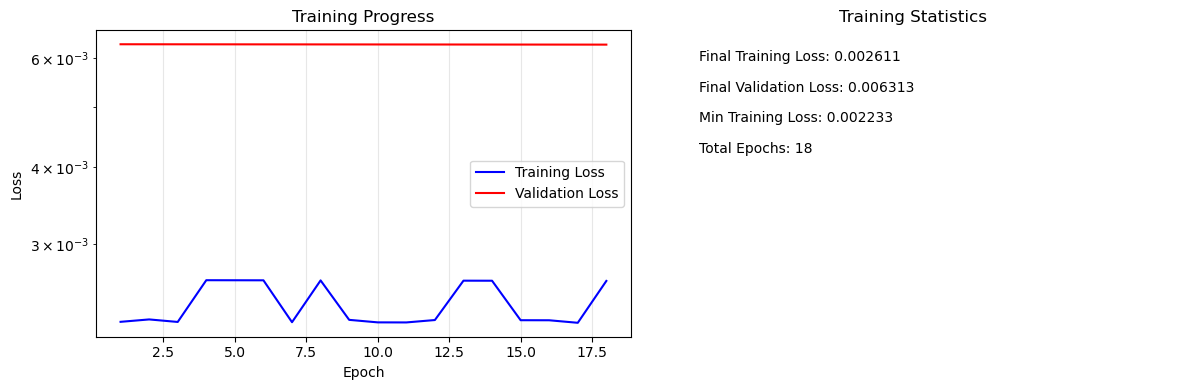

⚠️  NaN détecté après LSTM, remplacement par zéros
\nPredicted parameters for profile pair 0:
alpha0_down : -0.002573
alphaS_down : 0.000022
tau0_down   : 4.964025
tauS_down   : 0.065494
alpha0_up   : -0.002573
alphaS_up   : 0.000022
tau0_up     : 4.964025
tauS_up     : 0.065494


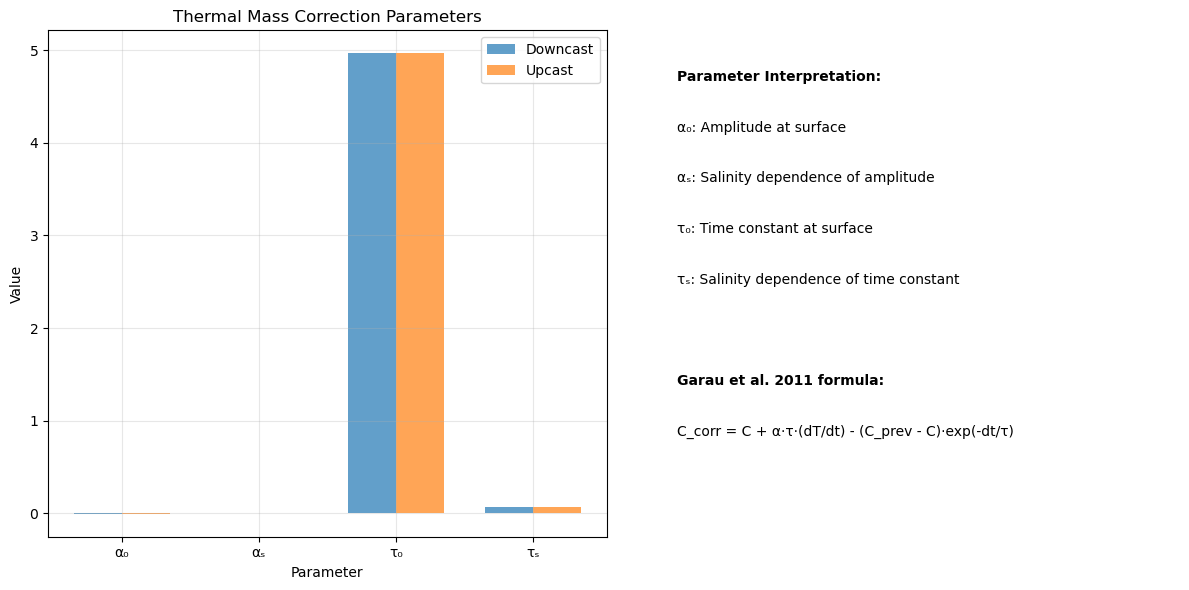

In [10]:
# Analyze training results and test the trained model
def analyze_training_results(train_losses, val_losses=None):
    """Plot training curves and analyze results"""
    if train_losses is None:
        print("No training results to analyze")
        return
    
    plt.figure(figsize=(12, 4))
    
    # Training curves
    plt.subplot(1, 2, 1)
    epochs = range(1, len(train_losses) + 1)
    plt.plot(epochs, train_losses, 'b-', label='Training Loss')
    if val_losses is not None:
        plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Progress')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    
    # Loss statistics
    plt.subplot(1, 2, 2)
    plt.text(0.1, 0.9, f"Final Training Loss: {train_losses[-1]:.6f}", transform=plt.gca().transAxes)
    if val_losses is not None:
        plt.text(0.1, 0.8, f"Final Validation Loss: {val_losses[-1]:.6f}", transform=plt.gca().transAxes)
    plt.text(0.1, 0.7, f"Min Training Loss: {min(train_losses):.6f}", transform=plt.gca().transAxes)
    plt.text(0.1, 0.6, f"Total Epochs: {len(train_losses)}", transform=plt.gca().transAxes)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('off')
    plt.title('Training Statistics')
    
    plt.tight_layout()
    plt.show()

def test_model_predictions(model, mvp_data, ctd_data, test_idx=0):
    """Test the model on a specific profile pair"""
    if model is None:
        print("No trained model available")
        return
    
    if test_idx >= len(mvp_data['TEMP_down']):
        print(f"Test index {test_idx} not available")
        return
    
    try:
        device = next(model.parameters()).device
        
        # Prepare test data
        dataset = ThermalMassDataset(mvp_data, ctd_data, sequence_length=800)
        test_sample = dataset[test_idx]
        
        # Add batch dimension
        input_features = test_sample['input_features'].unsqueeze(0).to(device)
        
        # Get model predictions
        model.eval()
        with torch.no_grad():
            predicted_params = model(input_features)
        
        # Extract parameters
        params = predicted_params[0].cpu().numpy()
        param_names = ['alpha0_down', 'alphaS_down', 'tau0_down', 'tauS_down',
                       'alpha0_up', 'alphaS_up', 'tau0_up', 'tauS_up']
        
        print(f"\\nPredicted parameters for profile pair {test_idx}:")
        print("=" * 50)
        for name, value in zip(param_names, params):
            print(f"{name:12s}: {value:.6f}")
        
        # Visualize parameters
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        down_params = params[:4]
        up_params = params[4:]
        x = np.arange(4)
        width = 0.35
        
        plt.bar(x - width/2, down_params, width, label='Downcast', alpha=0.7)
        plt.bar(x + width/2, up_params, width, label='Upcast', alpha=0.7)
        plt.xlabel('Parameter')
        plt.ylabel('Value')
        plt.title('Thermal Mass Correction Parameters')
        plt.xticks(x, ['α₀', 'αₛ', 'τ₀', 'τₛ'])
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Parameter interpretation
        plt.subplot(1, 2, 2)
        plt.text(0.1, 0.9, "Parameter Interpretation:", transform=plt.gca().transAxes, fontweight='bold')
        plt.text(0.1, 0.8, f"α₀: Amplitude at surface", transform=plt.gca().transAxes)
        plt.text(0.1, 0.7, f"αₛ: Salinity dependence of amplitude", transform=plt.gca().transAxes)
        plt.text(0.1, 0.6, f"τ₀: Time constant at surface", transform=plt.gca().transAxes)
        plt.text(0.1, 0.5, f"τₛ: Salinity dependence of time constant", transform=plt.gca().transAxes)
        plt.text(0.1, 0.3, "Garau et al. 2011 formula:", transform=plt.gca().transAxes, fontweight='bold')
        plt.text(0.1, 0.2, "C_corr = C + α·τ·(dT/dt) - (C_prev - C)·exp(-dt/τ)", transform=plt.gca().transAxes, fontsize=10)
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        return params
        
    except Exception as e:
        print(f"Error testing model: {e}")
        import traceback
        traceback.print_exc()
        return None

# Analyze results if training was successful
if 'trained_model' in locals() and trained_model is not None:
    print("\\n" + "="*60)
    print("TRAINING ANALYSIS")
    print("="*60)
    
    analyze_training_results(train_losses, val_losses if 'val_losses' in locals() else None)
    
    # Test model on first profile
    if len(mvp_data['TEMP_down']) > 0:
        predicted_params = test_model_predictions(trained_model, mvp_data, ctd_data, test_idx=0)
else:
    print("No trained model to analyze")

In [ ]:
from utils import garau_correction_nograd

id = 0

device = next(trained_model.parameters()).device

# Prepare test data
dataset = ThermalMassDataset(mvp_data, ctd_data, sequence_length=800)
test_sample = dataset[id]

# Add batch dimension
input_features = test_sample['input_features'].unsqueeze(0).to(device)

# Get model predictions
trained_model.eval()
with torch.no_grad():
    predicted_params = trained_model(input_features)

# Extract parameters
params = predicted_params[0].cpu().numpy()
param_names = ['alpha0_down', 'alphaS_down', 'tau0_down', 'tauS_down',
                'alpha0_up', 'alphaS_up', 'tau0_up', 'tauS_up']



T_down_corr = garau_correction_nograd(mvpa.TEMP_mvp_corr_interp[id], mvpa.COND_mvp_corr_interp[id], mvpa.PRES_mvp_corr_interp[id],
                               mvpa.SPEED_mvp_corr_interp[id],params[0],params[1],
                               params[2],params[3])
T_up_corr = garau_correction(mvpa.TEMP_mvp_corr_interp[id+1], mvpa.COND_mvp_corr_interp[id+1], mvpa.PRES_mvp_corr_interp[id+1],
                             mvpa.SPEED_mvp_corr_interp[id+1],params[4],params[5],
                             params[6],params[7])




⚠️  NaN détecté après LSTM, remplacement par zéros


ValueError: not enough values to unpack (expected 2, got 1)